In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code')
from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_1X
from tomo2mesh.projects.eaton.recon import recon_slice, recon_binned
from tomo2mesh.misc import viewer
from tomo2mesh.misc.voxel_processing import cylindrical_mask, modified_autocontrast
# from tomo2mesh.fbp.subset import recon_all
from tomo2mesh.misc import viewer
import pandas as pd
import glob

In [2]:
# flist = sorted([f.split('/')[-1] for f in glob.glob('/data01/Eaton_Polymer_AM/raw_data2/*.h5')])

In [3]:
projs, theta, center, dark, flat = read_raw_data_1X("TCRP3_AMTitan_200umlht", "146")

In [20]:
center_guess = 1163
search_width = 25 #200
search_res = 5
num = int(search_width/search_res + 1)

In [21]:
centers = np.linspace(-search_width//2+center_guess,search_width//2+center_guess,num, endpoint = True)

In [22]:
images = []
for ii, center in enumerate(centers):
    image = recon_slice(projs, theta, center, dark, flat, 0.5, 3.13)[np.newaxis,...]
    cylindrical_mask(image, 1.0, mask_val = image.min())
    image = image[0]
    images.append(image)
    print(r'%i of %i'%(ii, len(centers)), end = ";")

data shape: (ntheta, nz, n) (3000, 21, 2448)
0 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
1 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
2 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
3 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
4 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
5 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
6 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
7 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
8 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
9 of 11;data shape: (ntheta, nz, n) (3000, 21, 2448)
10 of 11;

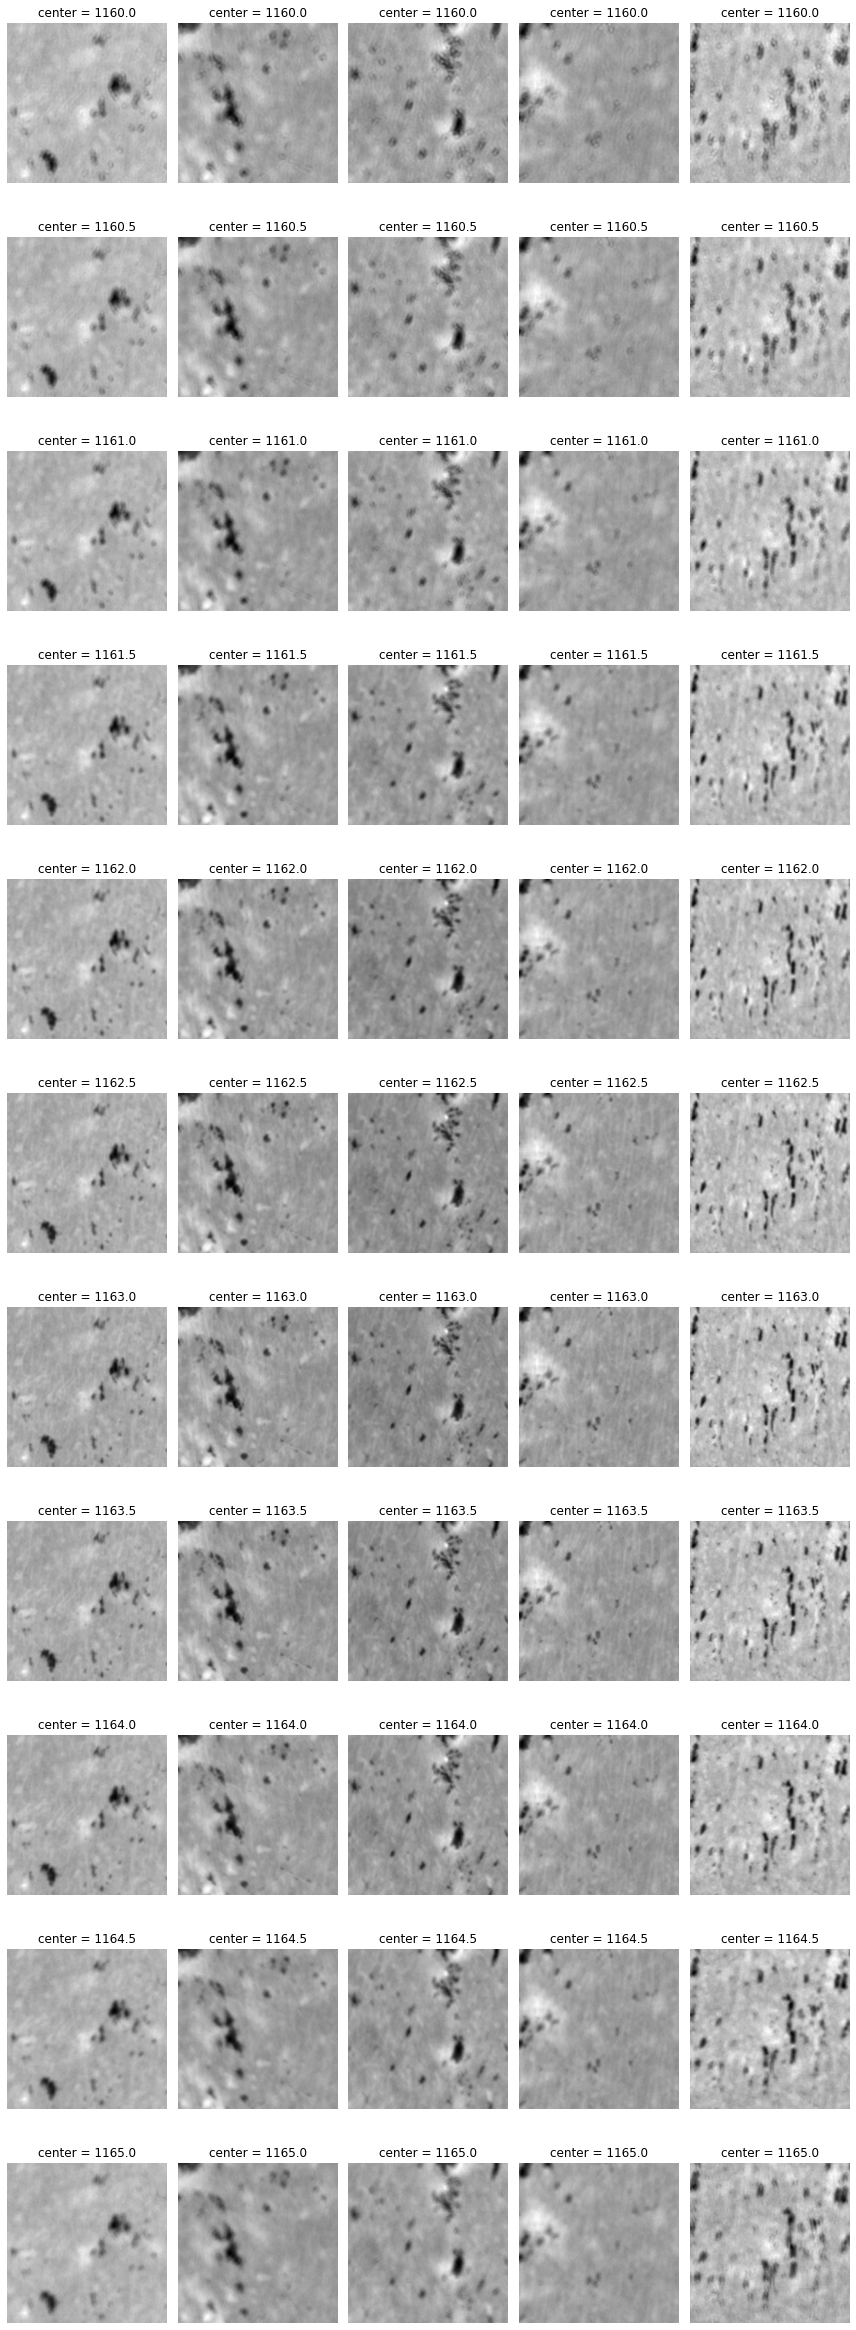

In [23]:
s = []
s.append((slice(500,750), slice(500,750)))
s.append((slice(500,750), slice(1750,2000)))      
s.append((slice(1500,1750), slice(500,750)))
s.append((slice(1500,1750), slice(1750,2000)))
s.append((slice(200,450), slice(1000,1250)))
fig, ax = plt.subplots(len(images),5, figsize = (12,len(images)/4.0*12))
for ii in range(len(images)):
    for i4 in range(5):
        ax[ii,i4].imshow(images[ii][s[i4]], cmap = 'gray')
        ax[ii,i4].set_title(f"center = {centers[ii]}")
        ax[ii,i4].axis('off')
fig.tight_layout()